# Linear codes over $F_2$

Everything we'll do is really over $F_2$, and the problem of correcting errors, quantum or otherwise will be reduced to bits (but keep in mind that ECC for Analogue dot prodeuct engines is different, also not covered here).

The underlying set of elements of $F_2$ is the set $\{0,1\}$ with addition $\oplus$ being bitwise XOR, and multiplication $\cdot$ being bitwise AND.

Excersize: Verify that the above definitions meet the axioms of a field. The axioms for multiplication are:

$\forall \alpha 1\cdot \alpha = \alpha \cdot 1 = \alpha$
$\forall \alpha, \beta \in F: \alpha \cdot \beta \in F$ \
$\forall \alpha, \beta \in F: \beta \cdot \alpha = \alpha \cdot \beta$ \
$\forall \alpha, \beta, \gamma \in F: \alpha\cdot(\beta \cdot \gamma) = (\alpha\cdot\beta) \cdot \gamma$ \
$\forall \alpha, \beta, \gamma \in F: \alpha\cdot(\beta \oplus \gamma) = (\alpha\cdot\beta) \oplus (\alpha \cdot \gamma)$ \
$\forall \alpha, \beta, \gamma \in F: \alpha\cdot(\beta \oplus \gamma) = (\alpha\cdot\beta) \oplus (\alpha \cdot \gamma)$ \
$\forall \alpha \neq 0 \exists \beta : \alpha \cdot \beta = 1$ 

Excersize: Verify that bitwise XOR and addition modulu 2 will give you the same answer for adding any number of 1's.

The first concept to understand (everything else builds on it) is bitwise XOR.

Given a vector of $n$ bits $\vec{(b_0 ..b_{n-1})}$, we form a new vector $\vec{(c,b_0 ..b_{n-1})}$ with $c= \oplus_{i=0..n-1}  b_i$.

Excersize: Check that $(\oplus_{i=0..n-1} b_i) \oplus c_0 = 0$

You can now check that if any odd number of bits from the $b_i$'s or $c_0$ are flipped, the result of $(\oplus_{i=1..n-1} b_i) \oplus c$ is 1.

The equation:
$$(\oplus_{i=1..n-1} b_i) \oplus c = 0$$
Is sometimes reffered to a Single Parity Checksum (SPC). 

What's happening here in terms of vector spaces ?

We started with a vector $\vec{(b_0 ..b_{n-1})}$ in $F_2^n$, and ended up with a vector $\vec{(c,b_0 ..b_{n-1})}$ in $F_2^{n+1}$. The set of all vectors of the form $\vec{((\oplus_{i=0..n-1} b_i) ,b_0 ..b_{n-1})}$ is a vector space on it's own, with dimension $n$.

Excersize: Verify that $\vec{((\oplus_{i=0..n-1} b_i) ,b_0 ..b_{n-1})}$  with the usual coordinate-wise addition is a vector space over $F_2$. Check that it is isomorphic to $F_2^n$, and so it is an $n$ dimensional subspace of $F_2^{n+1}$.

So we might as well have started with $F_2^{n+1}$, and restriced ourselves to to the subspace of vectors that satisfy: $\vec{c} = \vec{c_0, ..c_{n}}$ such that $\oplus_{i=0..n} c_i = 0$. If we noted the set $\{0..n-1\}$ as $I$, a set of indices, we would say that the code words are excatly those vectors that satisfy:
$$\oplus_{_{i\in I}} c_i == 0$$

This notation has the value of being subject to generalization, meaning, instead of $I = \{0..n-1\}$ we could choose a different set of indices.

A simple idea is that we can define these SPC's over different sets of indices from $\{0..n-1\}$, which we can denote by $I \subset \{0..n-1\}$ and obtain many linear equations, say $m$ of them:

$$ ( \oplus_{i\in I_0} b_i)  = 0 $$
$$ ( \oplus_{i\in I_1} b_i)  = 0 $$
.
.
.
$$ ( \oplus_{i\in I_{m-1}} b_i)  = 0 $$

Each equation above defines a subspace of $F^n$, and so we can look at their intersection, which is the null space (the kernel) of an $n \times m$ binary matrix $H$.
The rows of $H$ are defined by the the index sets $I_k$, namely: $H[i,j]=1$ if and only if the index $i$ is the index set $I_j$.

Excersize: Check that the parity matrix for the bitwise XOR is the all $1$ row vector.

You can also go the opposite way, meaning: start with a parity matrix, $H$, that has $m$ rows and $n$ columns, define $I_j \subset \{0..n-1\}$ as the set of indices where the $j$th row is non zero, and you'll get a Single Parity Checksum (SPC) defined by $I_j$. This will be really helpful when we talk about decoding later.

If $c$ and $d$ are both codewords, then so is $c\oplus d$. This is immediate from the fact that if $H\cdot c = 0$ and $H \cdot d = 0$ then $H\cdot (c \oplus d) = 0$.

## Some different takes on bitwise XOR 

Excersize: Define a polynomial $c(x)=c \oplus b_0 \cdot x \oplus b_1 \cdot x^2 \oplus ... \oplus b_{n-1}x^{n}$. Verify that $c(1) = 0$.

Excersize: Define a polynomial $b(x)=b_0 \oplus b_1 \cdot x \oplus ... \oplus b_{n-1}x^{n-1}$. Verify that $x\cdot b(x)$ evaluated at $x=1$ equals $c_0$. 

Excersize: Prove that $b(x)$ and $c(x)$ as defined above, satisfy $x \cdot b(x) mod (x+1) = c(x)$



# Low density Parity Check (LDPC) Codes
LDPC codes are codes that admit a parity check matrix which in which the number of non zeros in each row and each column is small. So in particular the parity check matrix is sparse.

In the code cells below you'll see a graphical representation of an SPC. Nodes are either bit nodes (variable nodes) or checksum nodes, so there are two types of nodes, with edges spanning from variable nodes to check nodes, but not variable to variable or check to check.

['v0', 'v1', 'v2', 'v3', 'v4', 'c']
EdgeList[(0, 5), (1, 5), (2, 5), (3, 5), (4, 5)]


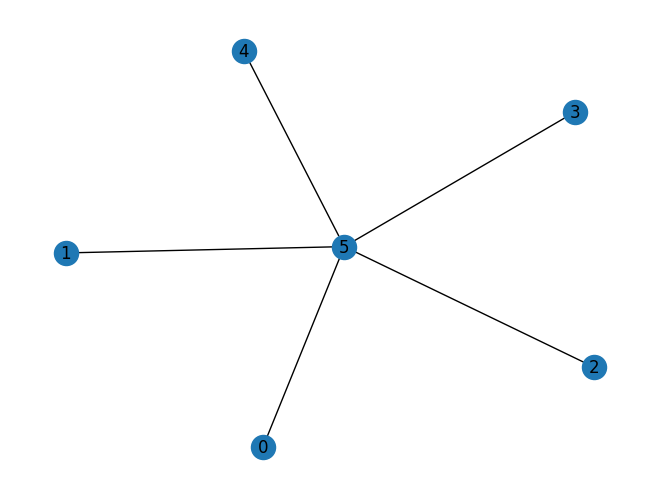

In [7]:
import rustworkx as rx
from rustworkx.visualization import mpl_draw
g = rx.PyGraph()

# N is the number of bits 
N = 5
variableNodes = [g.add_node(f"v{i}") for i in range(N)]
checkNodes = [g.add_node(f"c")]
# Add an edge between every variable node and the check node
for v in variableNodes:
    g.add_edge(v, checkNodes[0], None)

print(g.nodes())
print(g.edge_list())
print(g)
mpl_draw(g, with_labels=True)

True


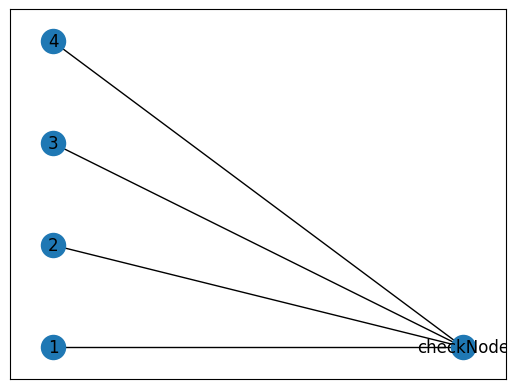

In [3]:
import networkx as nx
from networkx.algorithms import bipartite

# Create empty graph
B = nx.Graph()

# Add nodes with bipartite attribute
B.add_nodes_from([1, 2, 3, 4], bipartite=0) # Top set
B.add_nodes_from(['checkNode'], bipartite=1) # Bottom set

# Add edges between sets
B.add_edges_from([(1, 'checkNode'), (2, 'checkNode'), (3, 'checkNode'), (4, 'checkNode')])

# Check bipartiteness
print(bipartite.is_bipartite(B)) # True

# Get node sets
top_nodes = {n for n, d in B.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(B) - top_nodes

# Project graph onto one set
G_proj = bipartite.projected_graph(B, top_nodes)

# Draw bipartite layout
import matplotlib.pyplot as plt
nx.draw_networkx(B, pos=nx.bipartite_layout(B, top_nodes))
plt.show()